# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам из решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:

* применять библиотеку SciPy для минимизации функций
* делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

## Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

## Материалы

Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
Matplotlib User Guide: http://matplotlib.org/users/index.html

## Задание

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

### Задача 1. Минимизация гладкой функции

* Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
* В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
* Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
* Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
* Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
* Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
* Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
* Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

### Задача 2: глобальная оптимизация

* Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
* Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
* Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
* Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
* Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
* Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

### Задача 3. Минимизация негладкой функции

* Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
* Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
* Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
* Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
* Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
* Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

###### Блок импорта

In [1]:
import math
from matplotlib import pylab as plt
import numpy as np
import scipy.optimize as opt

ImportError: No module named _sparsetools

###### Целевая функция

In [ ]:
def f(x, ctx=math):
    '''Given function f(x). 
    Variable ctx is used to unify usage of any module:
    math or smth else - it is enough to change module.name in function definition'''
    #x = float(x)
    return ctx.sin(x/5) * ctx.exp(x/10) + 5*(ctx.exp(-x/2))

##### Строим график

In [2]:
xs = np.arange(1.0, 30., 0.01)
ys = [f(x) for x in xs]
plt.plot(xs,ys)

NameError: name 'f' is not defined

### Задача 1. Минимизация гладкой функции

##### Находим минимум методом градиентного спуска, задав два разных начальных приближения :
    1) х = 2
    2) х = 30

In [3]:
approx = 2
opt.minimize(f, approx, method="BFGS")

NameError: name 'opt' is not defined

In [4]:
approx = 30
opt.minimize(f,approx, method="BFGS",)

NameError: name 'opt' is not defined

##### Записываем в файл result 1 решение 1 задачи

In [5]:
result1_1 = round(opt.minimize(f, 2, method="BFGS").fun, 2)
result1_2 = round(opt.minimize(f, 30, method="BFGS",).fun, 2)
with open('result1.txt', 'w') as file:
    file.write(str(result1_1) + " " + str(result1_2))

NameError: name 'opt' is not defined

### Задача 2: глобальная оптимизация

##### Находим минимум (оптимум) функции генетическим методом. Для этого задаем минимальную и максимальную границы X, в которых метод будет подбирать значения

In [6]:
bounds = [(1,30)]
print opt.differential_evolution(f,bounds)

NameError: name 'opt' is not defined

##### Записываем в файл result2.txt решение 2 задачи

In [17]:
result2 = round(opt.differential_evolution(f, [(1,30)]).fun, 2)
with open('result2.txt', 'w') as file:
    file.write(str(result2))

### Задача 3. Минимизация негладкой функции

##### Задаем функцию h(x), x = int(f(x)

In [20]:
def int_f(x, ctx=math):
    '''Given function f(x). 
    Variable ctx is used to unify usage of any module:
    math or smth else - it is enough to change module.name in function definition'''
    return int(ctx.sin(x/5) * ctx.exp(x/10) + 5*(ctx.exp(-x/2)))

##### Строим график функции h(x)

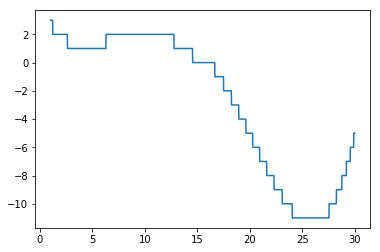

In [21]:
ys = [int_f(x) for x in xs]
plt.plot(xs,ys)

##### Находим минимум методом градиентного спуска, задав приближение 30

In [22]:
approx = 30
opt.minimize(int_f, approx, method="BFGS")

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

##### Находим минимум (оптимум) функции генетическим методом. Для этого задаем минимальную и максимальную границы X, в которых метод будет подбирать значения

In [23]:
bounds = [(1,30)]
opt.differential_evolution(int_f, bounds)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([26.00867194])

##### Записываем результат в файл result3

In [28]:
result3_1 = opt.minimize(int_f, 30, method="BFGS").fun
result3_2 = opt.differential_evolution(int_f, [(1,30)]).fun
with open('result3.txt', 'w') as file:
          file.write(str(result3_1) + " " + str(result3_2))